# Освещённость помещения

В работе был проведён анализ представленного помещения по освещённости. Характеристики помещения, требуемое значение освещения, количество и тип ламп указаны в файле Excel. Задача программы - провести анализ помещения по освещённости и подобрать оптимальные световые приборы для прямоугольного помещения.
Вначале проводим измерения светового потока с помощью люксметра в помещении, матрицу измерений вносим в листы файла Excel. Затем данные представляем визуализацию освещённости в виде карты, построенной с помощью функции colorbar из библиотеки matplotlib. Цветовая схема - winter, интерполяция данных - по Гауссу.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

without_light = pd.read_excel (r'Опыт освещённости.xlsx', sheet_name='without_light')
clear_weather = pd.read_excel (r'Опыт освещённости.xlsx', sheet_name='clear_weather')
night = pd.read_excel (r'Опыт освещённости.xlsx', sheet_name='night')
night_light = pd.read_excel (r'Опыт освещённости.xlsx', sheet_name='night_light')
source_data = pd.read_excel (r'Опыт освещённости.xlsx', sheet_name='source_data')

length = source_data.loc[0, 'value']
width = source_data.loc[1, 'value']
height = source_data.loc[2, 'value']
standard_illumination = source_data.loc[3, 'value']
number_of_lamps = source_data.loc[4, 'value']
room_dust = source_data.loc[5, 'value']
light = source_data.loc[6, 'value']
type_light = source_data.loc[7, 'value']
color_room = source_data.loc[8, 'value']

Экспериментальные данные при пасмурной погоде


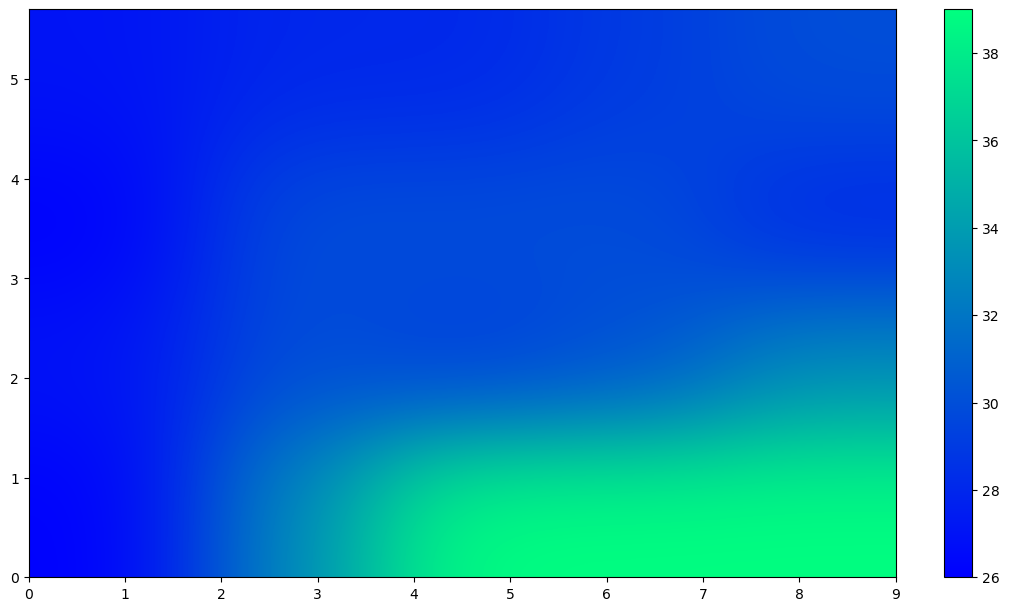

In [2]:
#экспериментальные данные при пасмурной погоде

fig, axs = plt.subplots(nrows = 1 , ncols = 1, figsize=(10,6), constrained_layout=True)

plots = axs.imshow(without_light, cmap='winter', aspect='auto', interpolation='gaussian', 
                origin="lower", extent=(0, length, 0, width))

fig.colorbar(plots, ax=axs)

print('\033[1m' + 'Экспериментальные данные при пасмурной погоде' + '\033[0m')

Экспериментальные данные при ясной погоде


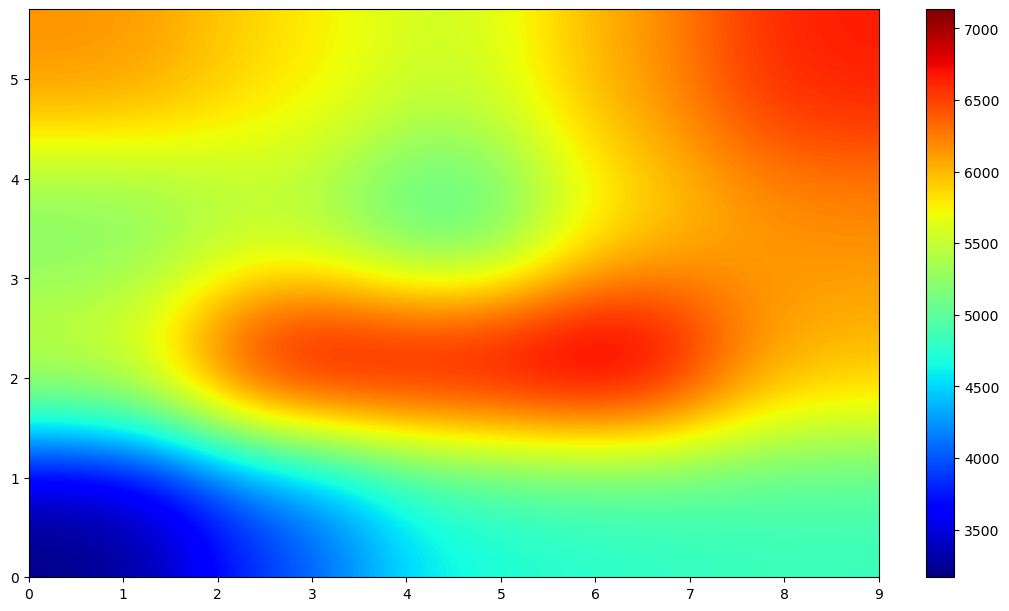

In [3]:
#экспериментальные данные при ясной погоде

fig, axs = plt.subplots(nrows = 1 , ncols = 1, figsize=(10,6), constrained_layout=True)

plots = axs.imshow(clear_weather, cmap='jet', aspect='auto', interpolation='gaussian', 
                origin="lower", extent=(0, length, 0, width))

fig.colorbar(plots, ax=axs)

print('\033[1m' + 'Экспериментальные данные при ясной погоде' + '\033[0m')

Экспериментальные данные при искусственном освещении ночью


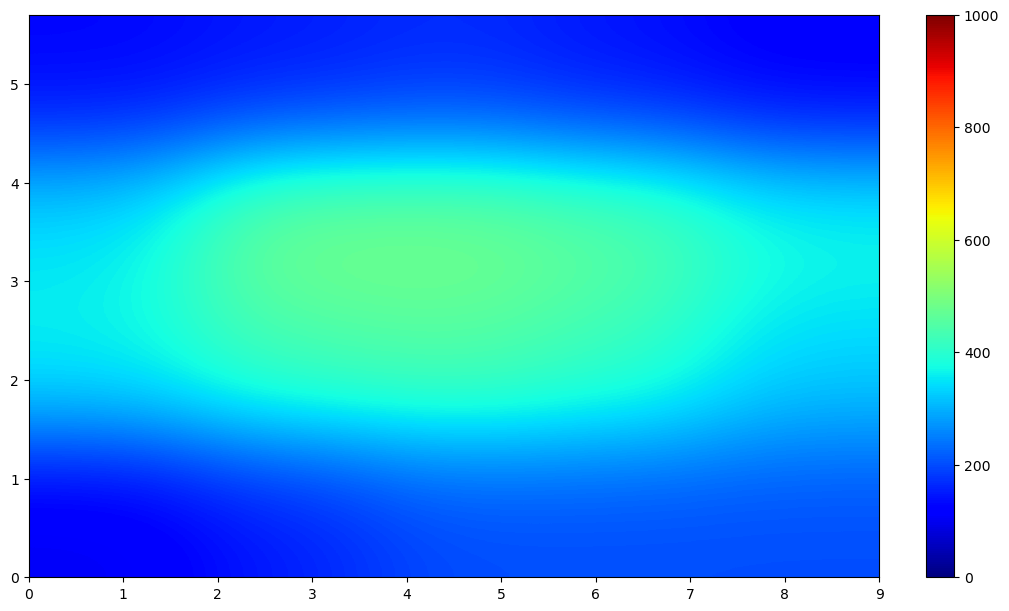

In [4]:
#экспериментальные данные при искусственном освещении ночью

fig, axs = plt.subplots(nrows = 1 , ncols = 1, figsize=(10,6), constrained_layout=True)

plots = axs.imshow(night_light, cmap='jet',vmin=0, vmax=1000, aspect='auto', interpolation='gaussian', 
                origin="lower", extent=(0, length, 0, width))

fig.colorbar(plots, ax=axs)

print('\033[1m' + 'Экспериментальные данные при искусственном освещении ночью' + '\033[0m')

Экспериментальные данные при ночном освещении


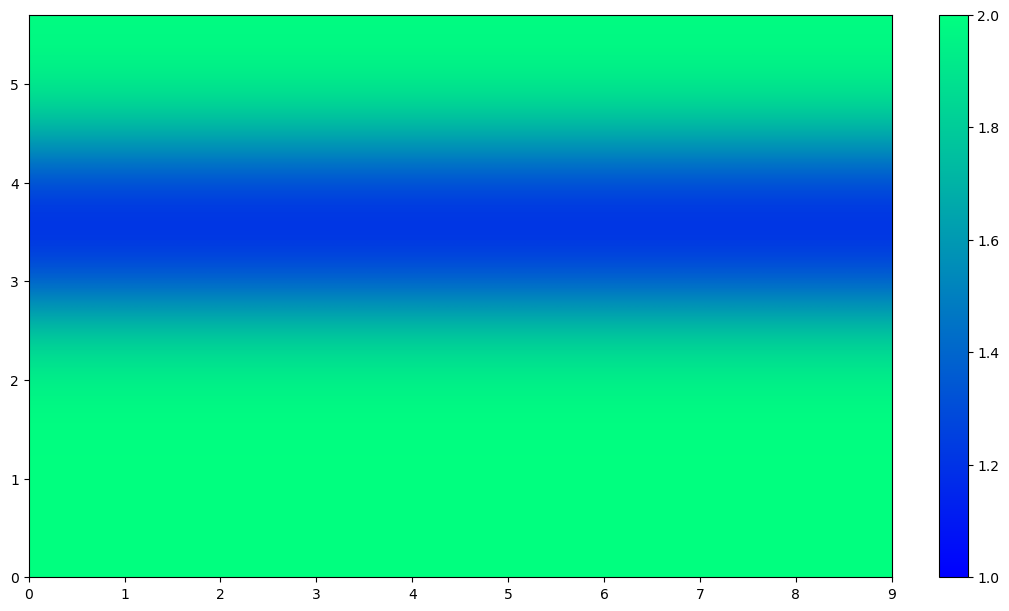

In [5]:
#экспериментальные данные при ночном освещении

fig, axs = plt.subplots(nrows = 1 , ncols = 1, figsize=(10,6), constrained_layout=True)

plots = axs.imshow(night, cmap='winter', aspect='auto', interpolation='gaussian', 
                origin="lower", extent=(0, length, 0, width))

fig.colorbar(plots, ax=axs)

print('\033[1m' + 'Экспериментальные данные при ночном освещении' + '\033[0m')

# Расчёт искусственного освещения

По результатам эксперимента не трудно сделать вывод, что необходимое освещение в помещении обеспечивается лишь при ясной погоде. Имеющегося искусственного освещения явно не достаточно. Нами была сформирована модель для расчёта необходимой величины светового потока, создаваемого одной лампочкой, для заданного прямоугольного помещения с известными параметрамии для определённого количества лампочек в помещении.

In [27]:
#экспорт файла с константами по освещённости Excel

light_characteristics = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='light_characteristics')
reflected_light = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='reflected_light')
wall_reflection = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='wall_reflection')
stock_ratio = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='stock_ratio')
luminous_flux = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='luminous_flux')
uneven_lighting = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='uneven_lighting')
incandescent_lamps = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='incandescent_lamps')
gas_lamps = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='gas_lamps')
led_lamps = pd.read_excel (r'Константы освещённости.xlsx', sheet_name='led_lamps')

uneven_lighting.set_index('светильник',inplace=True)

uneven_lighting = uneven_lighting.transpose()

uneven_lighting['index'] = uneven_lighting.index.astype(np.float64)

Пропишем процедуру аппроксимации в виде полинома n-го порядка. 

In [7]:
from scipy.optimize import curve_fit

def approx(x_graph, y_graph, polinom):   
    plt.figure(figsize=(12,5)) 
    plt.grid()
     
    params_graph = np.polyfit(x_graph, y_graph, polinom) 
    xp_graph = np.linspace(x_graph.min(), x_graph.max(), len(x_graph)*5)
    yp_graph = np.polyval(params_graph, xp_graph)
    plt.plot(xp_graph, yp_graph, color = 'k', linewidth = 2,)

    sig_graph = np.std(y_graph - np.polyval(params_graph, x_graph))
    #plt.fill_between(xp_graph, yp_graph - sig_graph, yp_graph + sig_graph, color='g', alpha=0.2)

    plt.errorbar(x_graph, y_graph, yerr = 1.5*sig_graph, color = 'b', fmt = 'D') 
    #plt.plot(x_graph, y_graph, linestyle = '--', color = 'r', linewidth = 2)
    
    return xp_graph, yp_graph, sig_graph

def func2(x, a, b, c):
        return a*x**2 + b*x + c

def func3(x, a, b, c, d): 
    return a * x**3 + b * x**2 + c*x + d

def func4(x, a, b, c, d, e): 
    return a * x**4 + b * x**3 + c*x**2 + d * x + e

Переключатель светильников и плафонов и выбор коэффициентов запаса для конкретных плафонов.

In [8]:
if type_light == 'with_blackout':  #селектор плафонов
    t_li = 0 
    torsch = 'С затемнением'
else: 
    if type_light == 'not_reflector': 
        t_li = 1
        torsch = 'Без отражателя'
    else: 
        if type_light == 'enameled': 
            t_li = 2
            torsch = 'Эмалированный'

if light == 'gas': select_lamp = gas_lamps #селектор светильников
else: 
    if light == 'incandescent': select_lamp = incandescent_lamps
    else: 
        if light == 'sun': select_lamp = incadescent_lamps
        else:
            if light == 'LED': select_lamp = led_lamps
                
if room_dust <= 1: stock_ratio_c = stock_ratio.at[2, light] #определение значения коэффициента запаса
else: 
    if room_dust < 5: stock_ratio_c = stock_ratio.at[1, light]
    else: stock_ratio_c = stock_ratio.at[0, light]
        
if color_room =='Темный': color_value = 0.3
else:
    if color_room == 'Средней светлости': color_value = 0.5
    else:
        if color_room == 'Светлый': color_value = 0.7


luminous_flux = luminous_flux[luminous_flux['светильник'] == torsch]

luminous_flux = luminous_flux[luminous_flux['потолок'] == color_value] 

luminous_flux_value = luminous_flux[[0.5, 0.8, 1, 1.5, 2, 3, 4, 5]]
lum_x = luminous_flux_value.columns.to_numpy().astype(np.float64)
lum_y = luminous_flux_value.iloc[0].to_numpy().astype(np.float64)

Формула определения коэффициента неравномерности освещения:
Z =  0.99 * l2h^2 + ( -3.03 ) * l2h + ( 3.32 )
l2h - отношение длины к высоте
Среднее квадратичное отклонение для уравнения: σ = 0.025


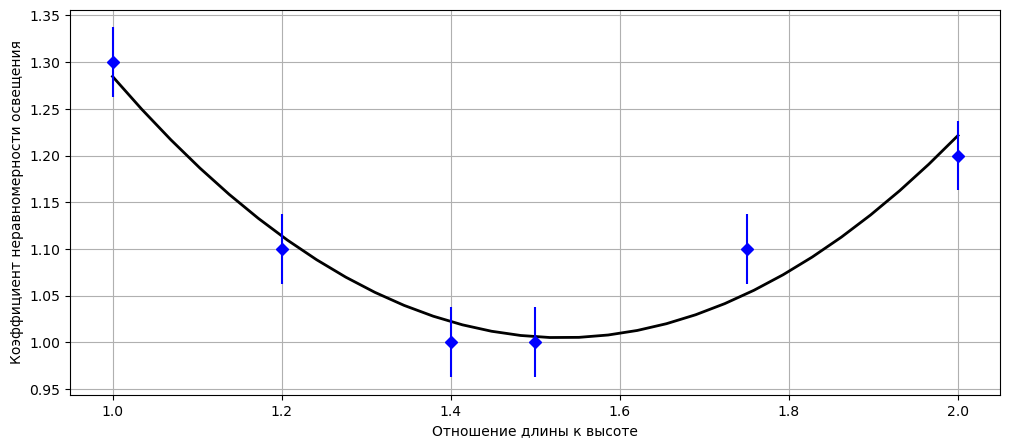

In [9]:
#полиномизация данных графика коэффициента неравномерности освещения для эмалированного светильника

xp_graph, yp_graph, sig_graph = approx(uneven_lighting['index'], uneven_lighting[torsch], 2)
plt.xlabel("Отношение длины к высоте")
plt.ylabel("Коэффициент неравномерности освещения")
#plt.show()

light_type, pcov = curve_fit(func2, xp_graph, yp_graph)

print('\033[1m' + 'Формула определения коэффициента неравномерности освещения:' + '\033[0m')
print('Z = ', round(light_type[0], 2), '* l2h^2 + (', round(light_type[1], 2), ') * l2h + (', round(light_type[2], 2), ')') 
print('l2h - отношение длины к высоте')  
print('Среднее квадратичное отклонение для уравнения: σ =', round(sig_graph, 3))

Определение коэффициента использования светового потока:
η =  0.016 φ^3 + ( -0.177 ) * φ^2 + ( 0.642 ) * φ + ( 0.154 )
φ - показатель формы помещения
Среднее квадратичное отклонение для уравнения: σ = 0.021


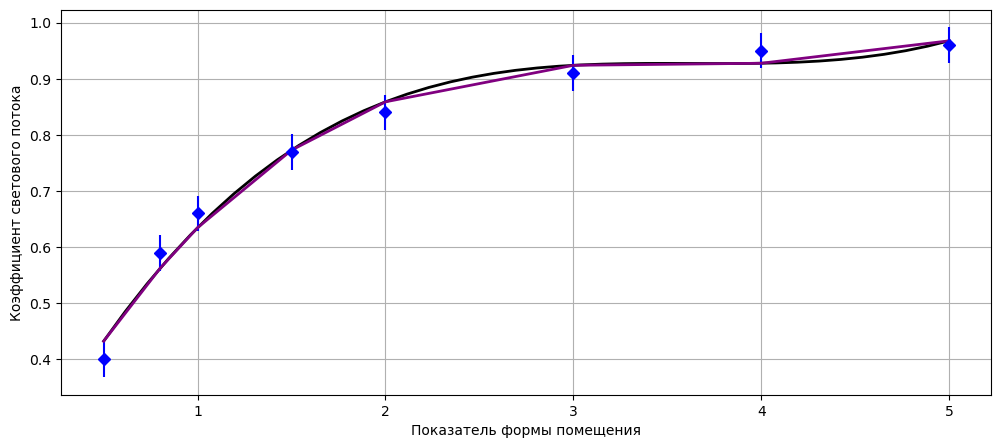

In [10]:
forms_room = length * width / (height * (length + width))

xpc_graph, ypc_graph, sig_graph = approx(lum_x, lum_y, 3)
plt.xlabel("Показатель формы помещения")
plt.ylabel("Коэффициент светового потока")

popt, pcov = curve_fit(func3, lum_x, lum_y)

plt.plot(lum_x, func3(lum_x, popt[0], popt[1], popt[2], popt[3]), color = 'purple', linewidth = 2)

flux_factor = func3(forms_room, popt[0], popt[1], popt[2], popt[3])

print('\033[1m'+ 'Определение коэффициента использования светового потока:' + '\033[0m')
print('η = ', round(popt[0],3), 'φ^3 + (', round(popt[1],3), 
                ') * φ^2 + (', round(popt[2],3), ') * φ + (', round(popt[3],3), ')')
print('φ - показатель формы помещения')
print('Среднее квадратичное отклонение для уравнения: σ =', round(sig_graph, 3))

Аппроксимация данных по коэффициенту неравномерности освещения прошла успешно. Теперь мы задаём данные для характеристики помещения. А также необходимое количество ламп, имеющиеся светильники и требуемую освещённость.

In [11]:
#определение коэффициента неравномерности освещения
import math

l2h = length / height
uneven_illumination = func2(l2h, light_type[0], light_type[1], light_type[2])

floor_area = length * width #площадь пола

luminos = stock_ratio_c * floor_area * standard_illumination /(number_of_lamps *
                                                       flux_factor * uneven_illumination)

print('\033[1m' + "Вывод:")
print('\033[0m')
print('Расчётное значение величины светого потока', round(luminos, 3), 'люмен')

def selection(lamps, lumen):
    itter = 0
    compare = 0
    percent = 0.04
    
    while compare < lumen:
        compare = lamps.loc[itter, 'Световой поток']
        itter+=1
        if itter == lamps.shape[0]:
            break
    
    if lumen > compare:
        lampsn = stock_ratio_c * floor_area * standard_illumination /(compare *
                                                       flux_factor * uneven_illumination)
        lampsn = math.ceil(lampsn)
                
    itter = itter - 1
    allow = lamps.loc[itter-1, 'Световой поток'] + lamps.loc[itter-1, 'Световой поток'] * percent
    
    if lumen > allow:
        light_index = itter
    else: light_index = itter - 1

    return lamps.loc[light_index, 'Тип'], lamps.loc[light_index, 'Мощность'], lamps.loc[light_index, 'Световой поток'], lampsn

sel, power, lumen, lampsn = selection(select_lamp, luminos)

print()
print('Рекомендуемый тип лампы', sel, 'мощностью', power, 'Вт, значение величины светового потока', 
              lumen, "люмен в количестве", lampsn, "штук")

Вывод:

Расчётное значение величины светого потока 5437.909 люмен

Рекомендуемый тип лампы LED мощностью 60 Вт, значение величины светового потока 5200.0 люмен в количестве 11 штук


Запустим поиск в Яндексе по рекомендуемому типу лампы.

In [12]:
import webbrowser 
web_url= 'https://yandex.ru/search/?text=' + sel + '+лампа+'+ str(power) +'+вт'
#webbrowser.open_new_tab(web_url) 

In [30]:
led_lamps.to_csv ('led_lamps.csv', index=False, encoding='cp1251')